In [ ]:
# https://www.scaler.com/topics/deep-learning/lstm-time-series/ 
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
from pylab import rcParams
import matplotlib.pyplot as plt

RANDOM_SEED = 42
np.random.seed(RANDOM_SEED)
tf.random.set_seed(RANDOM_SEED)


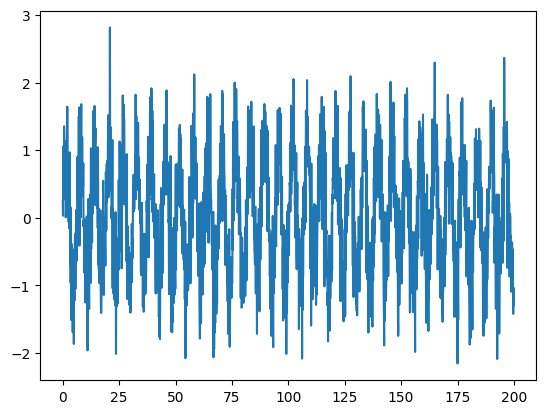

In [ ]:
data_time = np.arange(0, 200, 0.1)
sin_values = np.sin(data_time) + np.random.normal(scale=0.5, size=len(data_time))
plt.plot(data_time, sin_values, label='sine (with noise)')


In [20]:
data_full = pd.DataFrame(dict(sine=sin_values), index=data_time, columns=['sine'])
print(data_full.head())

len_train = int(len(data_full) * 0.8)
len_test = len(data_full) - len_train
train, test = data_full.iloc[0:len_train], data_full.iloc[len_train:len(data_full)]
print(train.shape, test.shape)


         sine
0.0  0.248357
0.1  0.030701
0.2  0.522514
0.3  1.057035
0.4  0.272342
(1600, 1) (400, 1)


In [11]:
def gen_data(X, y, num_steps=1):
    Xs, ys = [], []
    for i in range(len(X) - num_steps):
        Xs.append(X.iloc[i:(i + num_steps)].values)       
        ys.append(y.iloc[i + num_steps])
    return np.array(Xs), np.array(ys)
    
num_steps = 10
trainX, trainY = gen_data(train, train.sine, num_steps)
testX, testY = gen_data(test, test.sine, num_steps)
print(trainX.shape, trainY.shape)
print(testX.shape, testY.shape)

(1590, 10, 1) (1590,)
(390, 10, 1) (390,)


In [12]:
lstm_model = keras.Sequential()
lstm_model.add(keras.layers.LSTM(128, input_shape=(trainX.shape[1], trainX.shape[2])))
lstm_model.add(keras.layers.Dense(1))
lstm_model.compile(loss='mean_squared_error', optimizer=keras.optimizers.Adam(0.001))


/Users/jwheo/Projects/etc_project/.venv/lib/python3.10/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [13]:
callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)]


In [14]:
history = lstm_model.fit(
    trainX, trainY, 
    epochs=30, 
    batch_size=16, 
    validation_split=0.1,
    shuffle=False,
    callbacks=[tf.keras.callbacks.EarlyStopping(monitor='loss', patience=3)],
)


Epoch 1/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 5s 16ms/step - loss: 0.3930 - val_loss: 0.3584
Epoch 2/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3086 - val_loss: 0.3555
Epoch 3/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3076 - val_loss: 0.3538
Epoch 4/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.3070 - val_loss: 0.3520
Epoch 5/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 2s 16ms/step - loss: 0.3062 - val_loss: 0.3499
Epoch 6/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3053 - val_loss: 0.3479
Epoch 7/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3044 - val_loss: 0.3462
Epoch 8/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step - loss: 0.3037 - val_loss: 0.3449
Epoch 9/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3031 - val_loss: 0.3439
Epoch 10/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.3025 - val_loss: 0.3432
Epoch 11/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 12ms/step - loss: 0.3019 - val_loss: 0.3427
Epoch 12/30
90/90 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.3

In [16]:
lstm_model.evaluate(testX, testY)


13/13 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.3060


0.3031798005104065

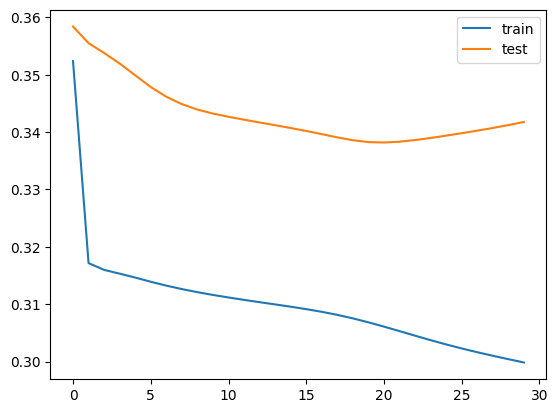

In [18]:
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()


13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 42ms/step


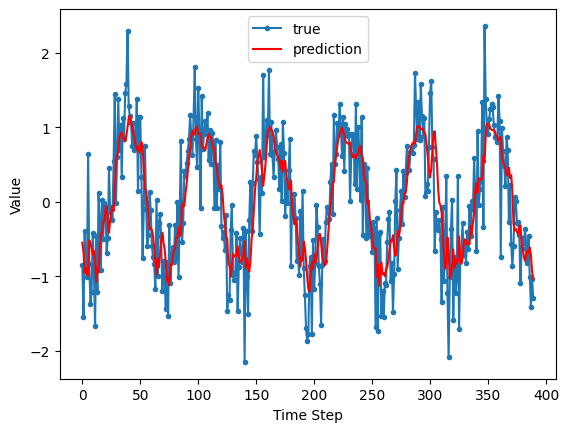

In [ ]:
y_pred = lstm_model.predict(testX)
plt.plot(testY, marker='.', label="true")
plt.plot(y_pred, 'r', label="prediction")
plt.ylabel('Value')
plt.xlabel('Time Step')
plt.legend()
plt.show()
